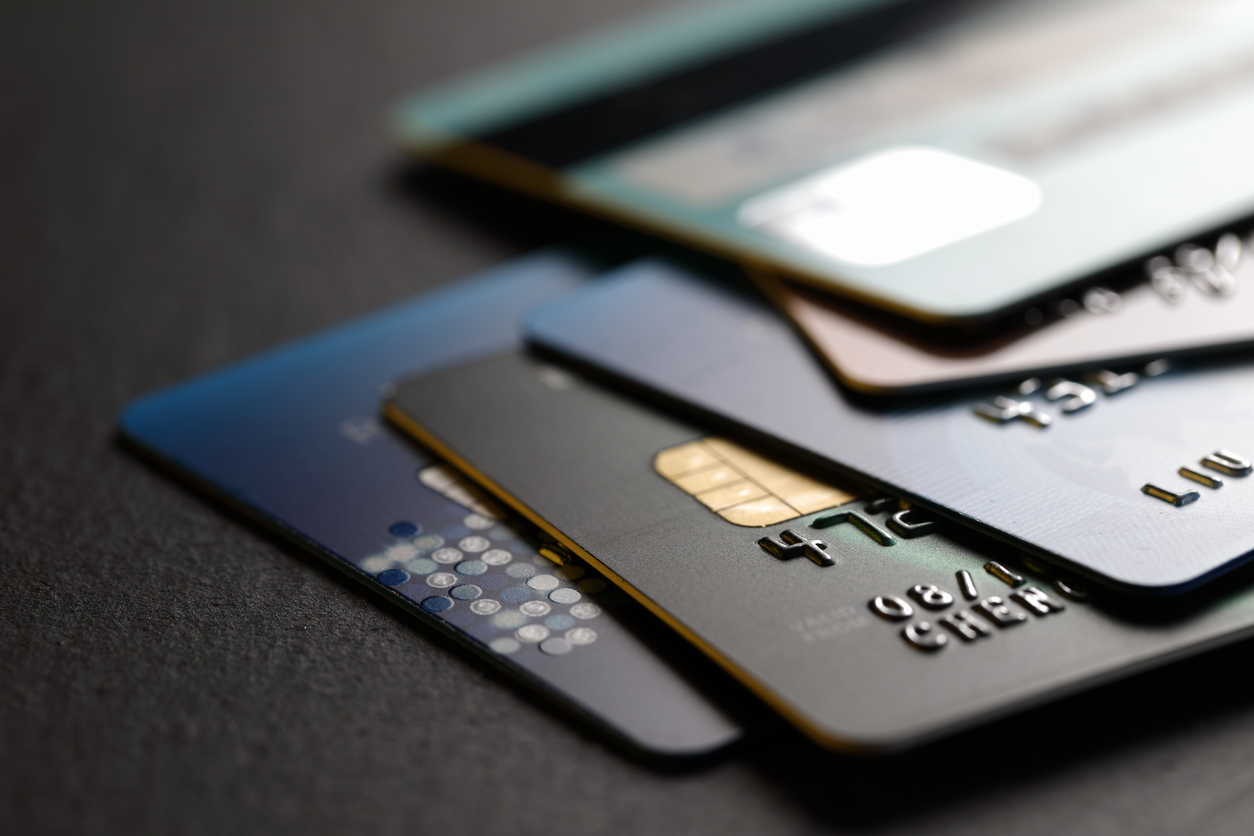

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, precision_recall_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score
from sklearn.metrics import classification_report, roc_auc_score

# Load the Dataset

In [2]:
data=pd.read_csv ("C:\\Users\\Siddhesh\\OneDrive\\Desktop\\ML\\creditcard.csv")

# Display Top 5 Rows of The Dataset

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Check Last 5 Rows of The Dataset

In [4]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


# Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [5]:
data.shape

(284807, 31)

In [6]:
print("Number of rows",data.shape[0])
print("Number of columns", data.shape[1])

Number of rows 284807
Number of columns 31


# Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Exploratory Data Analysis (EDA)

In [8]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

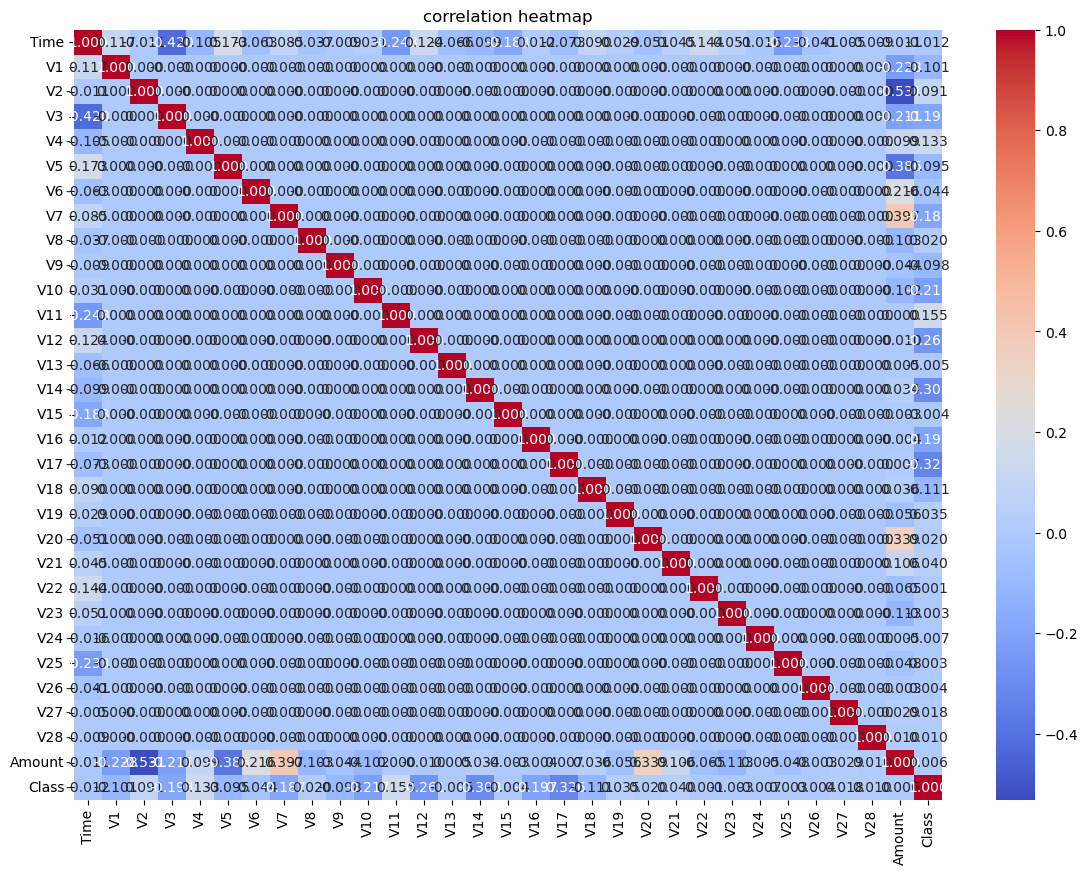

In [9]:
plt.figure(figsize=(14,10))
corr=data.corr()
sns.heatmap(corr,cmap='coolwarm',annot=True,fmt=".3f")
plt.title("correlation heatmap")
plt.show

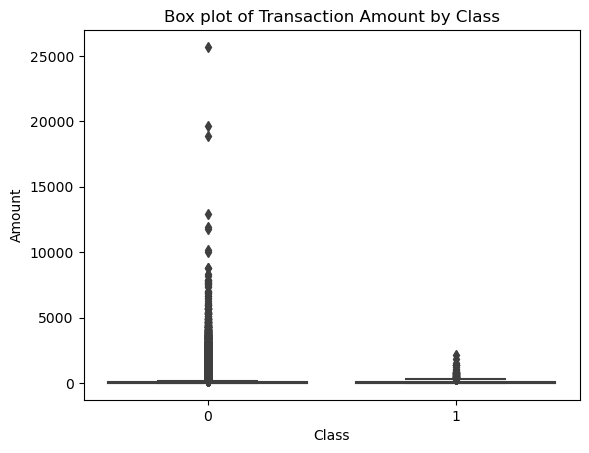

In [10]:
sns.boxplot(x='Class', y='Amount', data=data)
plt.xlabel('Class')
plt.ylabel('Amount')
plt.title('Box plot of Transaction Amount by Class')
plt.show()

# Check Null Values In The Dataset

In [11]:
data.isnull().sum() # there are no null values in dataset

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Feature Scaling

In [12]:
Q1 = data['Amount'].quantile(0.25)
Q3 = data['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data['Amount'] >= lower_bound) & (data['Amount'] <= upper_bound)]

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['Amount', 'Time']] = scaler.fit_transform(data[['Amount', 'Time']])

In [14]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.810949,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.014580,0
3,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.669377,0
4,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.379350,0
5,0.000012,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0.019892,0


In [15]:
data.shape

(252903, 31)

There are total 9144 duplicated values removed

# Finding Imbalanced

In [16]:
data['Class'].value_counts()

0    252502
1       401
Name: Class, dtype: int64

In [17]:
classes = ['Class 0', 'Class 1']
counts = [252502, 401]


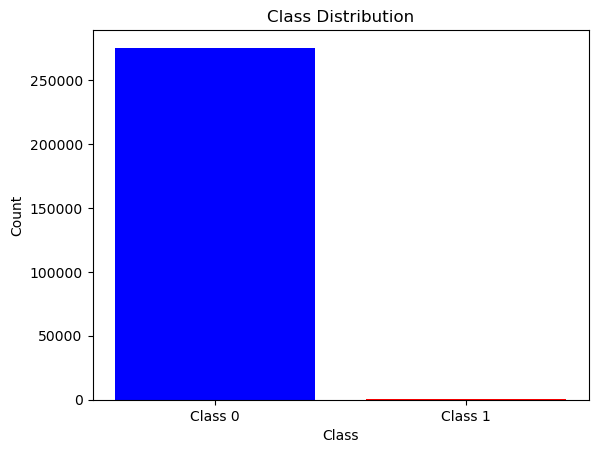

In [18]:
plt.bar(classes, counts, color=['blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

There is high imbalance in dataset

# Store Feature Matrix In X And Response (Target) In Vector y

In [19]:
X=data.drop('Class',axis=1)
y=data['Class']

# Splitting The Dataset Into The Training Set And Test Set

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

# Undersampling

In [21]:
normal = data[data['Class']==0]
fraud = data[data['Class']==1]

In [22]:
normal.shape

(252502, 31)

In [23]:
fraud.shape

(401, 31)

In [24]:
normal_sample=normal.sample(n=401)

In [25]:
normal_sample.shape

(401, 31)

In [26]:
new_data = pd.concat([normal_sample,fraud],ignore_index=True)

In [27]:
new_data['Class'].value_counts()

0    401
1    401
Name: Class, dtype: int64

In [28]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.136641,1.387525,-0.547811,0.076422,-0.739334,-0.519887,-0.026007,-0.694673,-0.052100,0.378187,...,-0.658299,-1.307286,-0.013221,-0.912415,0.163178,0.920997,-0.096560,-0.014846,0.169919,0
1,0.406006,-1.201572,0.341553,1.047015,0.830852,0.584272,1.346685,-0.105539,0.457781,0.733341,...,-0.179132,0.209285,-0.005711,-1.294926,0.326587,-0.144721,0.296740,0.152041,0.098482,0
2,0.424231,0.985866,-0.129354,0.640895,1.240229,0.044843,1.332376,-0.455193,0.544569,0.673425,...,0.071731,0.573419,0.054260,-0.624562,0.358167,-0.176469,0.105658,0.008637,0.039675,0
3,0.865182,-1.064407,0.677792,1.371673,0.269541,0.601436,0.304308,0.454620,0.259099,0.355904,...,-0.464577,-1.134631,-0.057864,-0.561577,-0.194672,-1.105753,0.142825,0.255800,0.096585,0
4,0.459523,1.226718,-0.439848,0.784821,-0.913848,-1.031448,-0.322949,-0.712360,0.159841,1.650733,...,0.012735,0.230361,-0.083391,0.015191,0.498996,-0.682220,0.086527,0.020847,0.005420,0


In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

# Logistic Regression

In [30]:

log = LogisticRegression(random_state=42)
log.fit(X_train,y_train)

C:\Users\Siddhesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [31]:
y_pred1 = log.predict(X_test)

In [32]:
print(classification_report(y_test,y_pred1 ))

print("AUC: ", roc_auc_score(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50490
           1       0.84      0.62      0.71        91

    accuracy                           1.00     50581
   macro avg       0.92      0.81      0.85     50581
weighted avg       1.00      1.00      1.00     50581

AUC:  0.8075833752304341


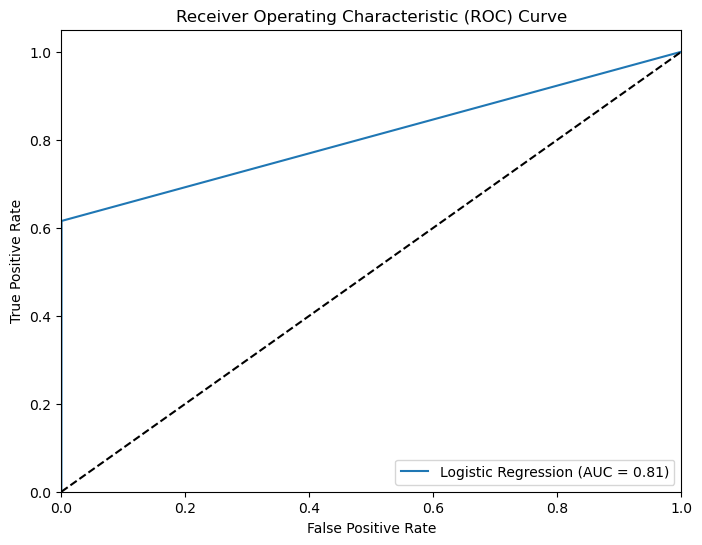

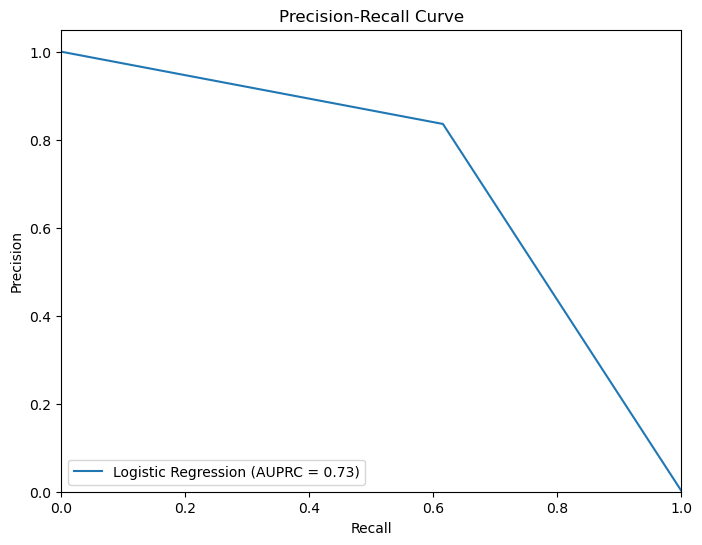

In [87]:
# Get the predicted probabilities for the positive class (fraud) from the logistic regression model
y_pred_prob_l0g = logistic_regression.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and threshold for the ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred1)

# Compute the precision, recall, and threshold for the Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred1)

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Compute the area under the Precision-Recall curve
pr_auc = auc(recall, precision)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Logistic Regression (AUPRC = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Decision Tree Classifier

In [33]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [34]:
y_pred2 = dt.predict(X_test)

In [35]:
print(classification_report(y_test,y_pred2 ))

print("AUC: ", roc_auc_score(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50490
           1       0.80      0.73      0.76        91

    accuracy                           1.00     50581
   macro avg       0.90      0.86      0.88     50581
weighted avg       1.00      1.00      1.00     50581

AUC:  0.8624690124690125


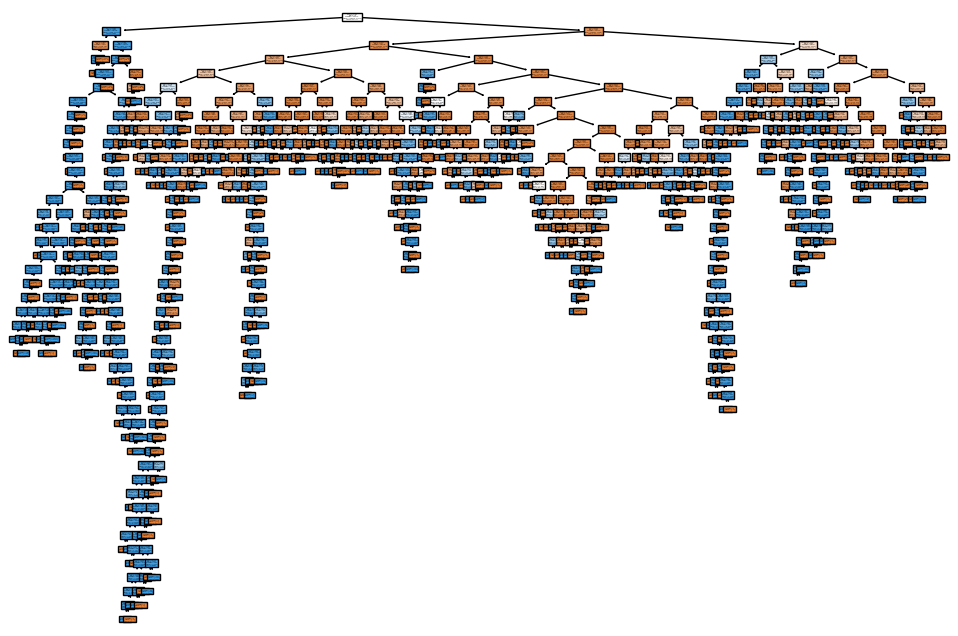

In [85]:
from sklearn.tree import plot_tree

# Get the list of feature names
feature_names = X.columns.tolist()

# Visualize the Decision Tree model
plt.figure(figsize=(12, 8))
plot_tree(decision_tree, feature_names=feature_names, class_names=['Genuine', 'Fraud'], filled=True)
plt.show()

# Random Forest Classifier

In [36]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [37]:
y_pred3 = rf.predict(X_test)

In [38]:
print(classification_report(y_test,y_pred3 ))
print("AUC: ", roc_auc_score(y_test,y_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50490
           1       0.93      0.76      0.84        91

    accuracy                           1.00     50581
   macro avg       0.97      0.88      0.92     50581
weighted avg       1.00      1.00      1.00     50581

AUC:  0.8790713643654819


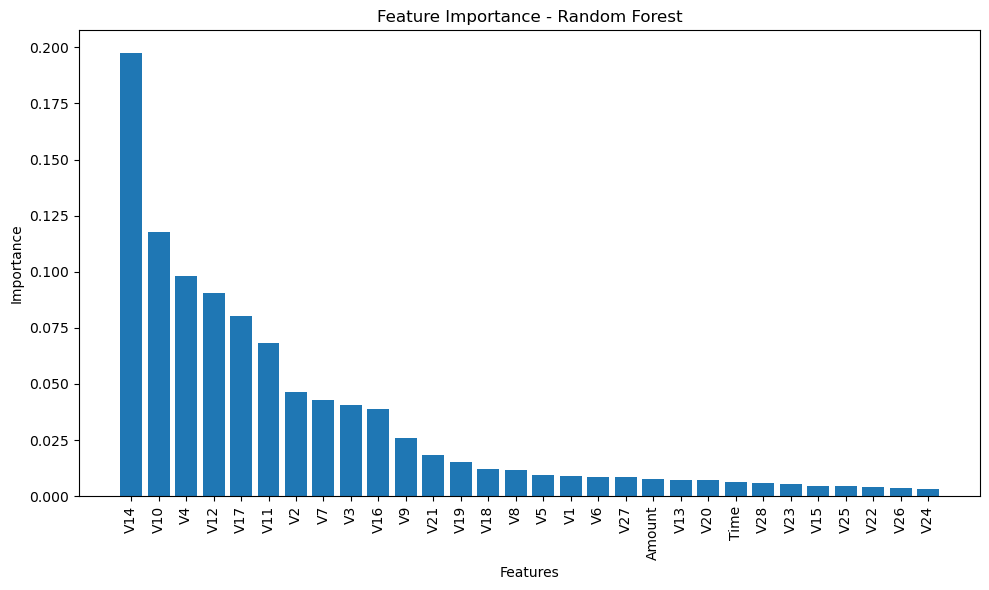

In [84]:
# Get feature importances from the Random Forest model
feature_importances = random_forest.feature_importances_

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]
sorted_importances = feature_importances[sorted_indices]

# Get the names of the sorted features
sorted_feature_names = X_train.columns[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), sorted_importances)
plt.xticks(range(len(feature_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()


# Support Vector Machines (SVM)

In [39]:
svm = SVC(random_state=42)
svm.fit(X_train,y_train)

SVC(random_state=42)

In [40]:
y_pred4 = rf.predict(X_test)

In [41]:
print(classification_report(y_test,y_pred4 ))
print("AUC: ", roc_auc_score(y_test,y_pred4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50490
           1       0.93      0.76      0.84        91

    accuracy                           1.00     50581
   macro avg       0.97      0.88      0.92     50581
weighted avg       1.00      1.00      1.00     50581

AUC:  0.8790713643654819


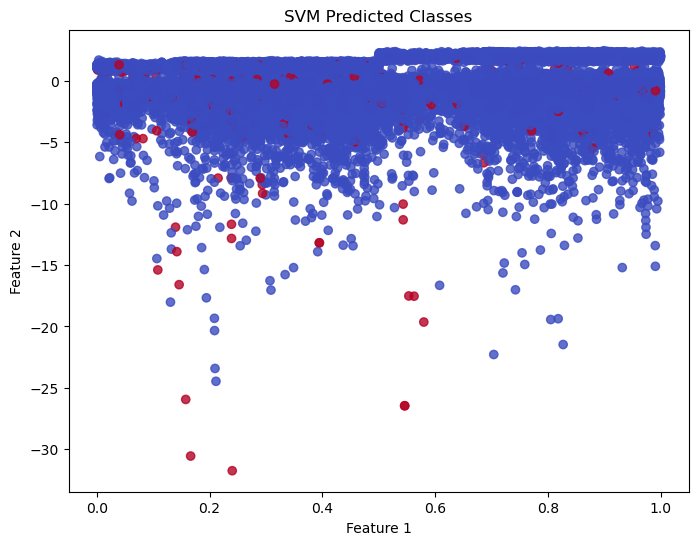

In [86]:
# Extract the two features for visualization
X_vis = X_test.iloc[:, :2].values
# Create a scatter plot of the predicted classes
plt.figure(figsize=(8, 6))
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_pred_svm, cmap='coolwarm', alpha=0.8)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Predicted Classes')
plt.show()


# Handling Imbalanced Dataset

In [42]:
X.shape

(252903, 30)

In [43]:
y.shape

(252903,)

In [44]:
!pip install imbalanced-learn

In [45]:
from imblearn.over_sampling import SMOTE

In [46]:
X_res,y_res=SMOTE().fit_resample(X,y)

In [47]:
y_res.value_counts()

0    252502
1    252502
Name: Class, dtype: int64

In [48]:

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Logistic Regression

In [49]:

logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train_resampled, y_train_resampled)

LogisticRegression(random_state=42)

In [50]:
y_pred_lr = logistic_regression.predict(X_test)

In [51]:
from sklearn.metrics import classification_report, roc_auc_score

In [52]:
print(classification_report(y_test,y_pred_lr ))

print("AUC: ", roc_auc_score(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     50490
           1       0.08      0.92      0.15        91

    accuracy                           0.98     50581
   macro avg       0.54      0.95      0.57     50581
weighted avg       1.00      0.98      0.99     50581

AUC:  0.9522494934259641


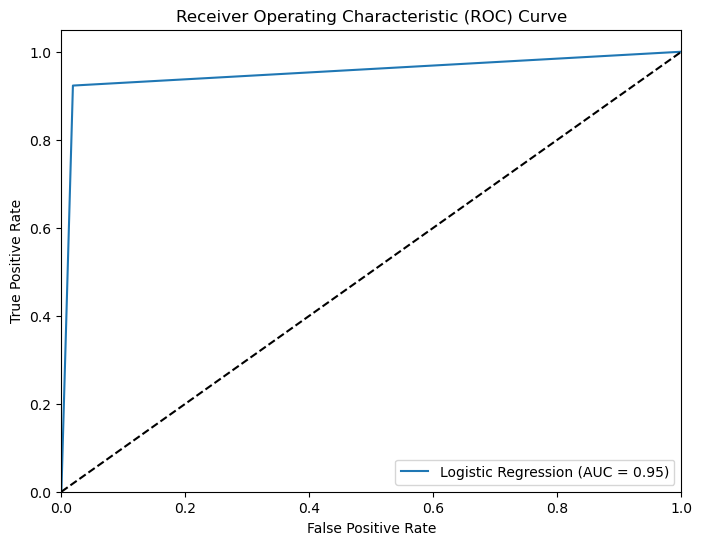

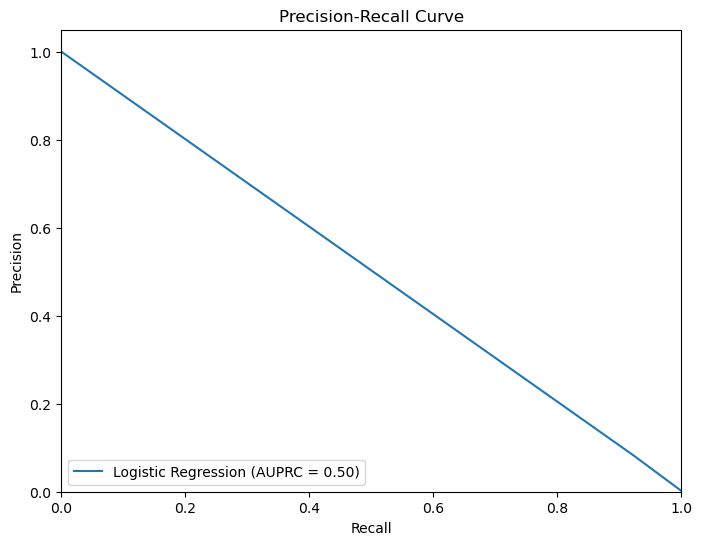

In [53]:



# Get the predicted probabilities for the positive class (fraud) from the logistic regression model
y_pred_prob_lr = logistic_regression.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and threshold for the ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_lr)

# Compute the precision, recall, and threshold for the Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_lr)

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Compute the area under the Precision-Recall curve
pr_auc = auc(recall, precision)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Logistic Regression (AUPRC = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Decision Tree Classifier

In [54]:

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [55]:
y_pred_dt = decision_tree.predict(X_test)

In [56]:
print(classification_report(y_test, y_pred_dt))
print("AUC: ", roc_auc_score(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50490
           1       0.48      0.78      0.59        91

    accuracy                           1.00     50581
   macro avg       0.74      0.89      0.80     50581
weighted avg       1.00      1.00      1.00     50581

AUC:  0.8893473628767746


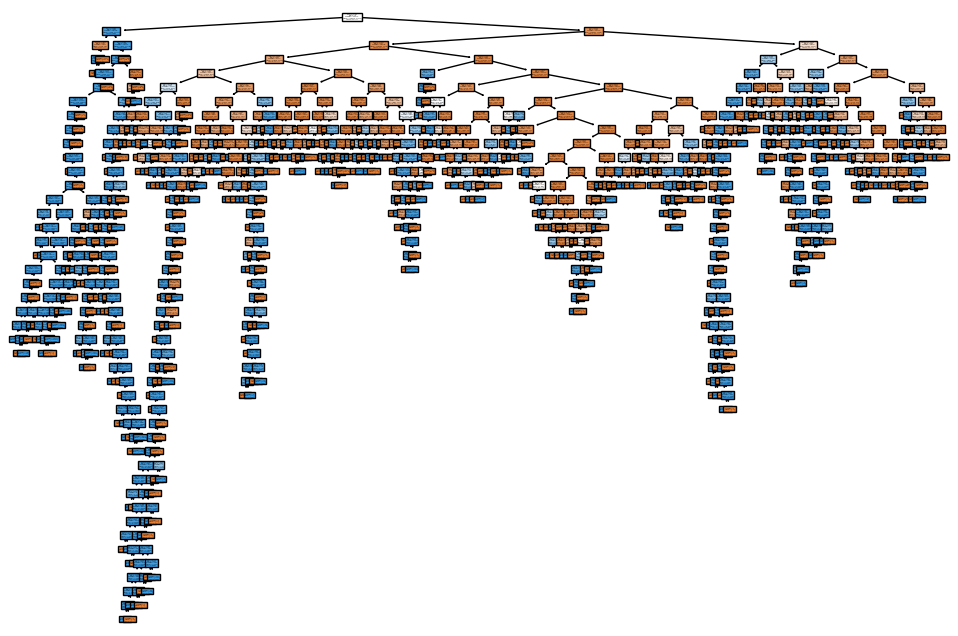

In [57]:
from sklearn.tree import plot_tree

# Get the list of feature names
feature_names = X.columns.tolist()

# Visualize the Decision Tree model
plt.figure(figsize=(12, 8))
plot_tree(decision_tree, feature_names=feature_names, class_names=['Genuine', 'Fraud'], filled=True)
plt.show()

# Random Forest Classifier

In [58]:

random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [59]:
y_pred_rf = random_forest.predict(X_test)

In [60]:
print(classification_report(y_test,y_pred_rf ))
print("AUC: ", roc_auc_score(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50490
           1       0.91      0.85      0.87        91

    accuracy                           1.00     50581
   macro avg       0.95      0.92      0.94     50581
weighted avg       1.00      1.00      1.00     50581

AUC:  0.9229976994682878


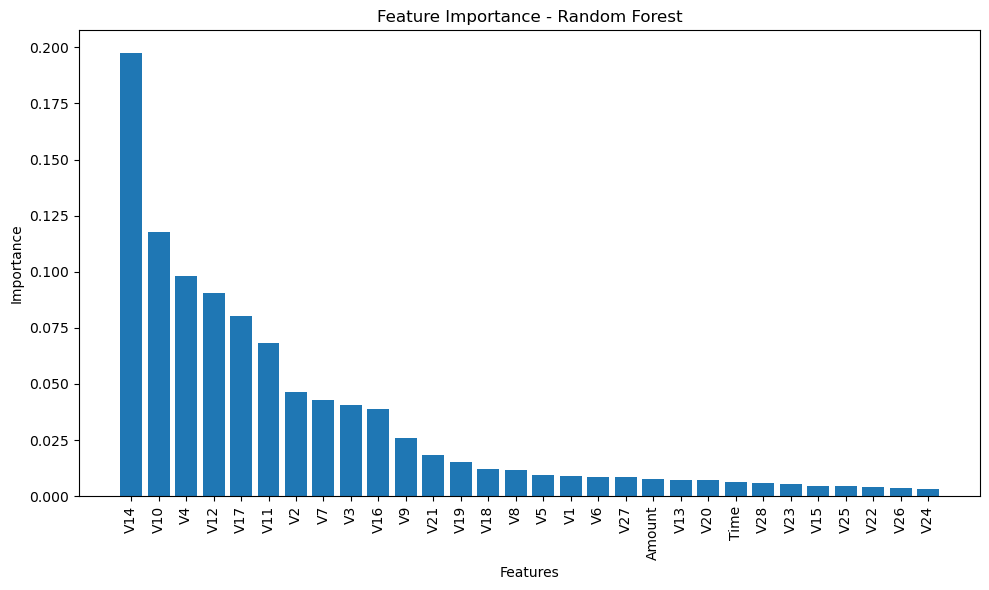

In [61]:


# Get feature importances from the Random Forest model
feature_importances = random_forest.feature_importances_

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]
sorted_importances = feature_importances[sorted_indices]

# Get the names of the sorted features
sorted_feature_names = X_train.columns[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), sorted_importances)
plt.xticks(range(len(feature_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()


# Support Vector Machines (SVM)

In [62]:

svm = SVC(random_state=42)
svm.fit(X_train_resampled, y_train_resampled)

SVC(random_state=42)

In [63]:
y_pred_svm = svm.predict(X_test)

In [64]:
print(classification_report(y_test, y_pred_svm))
print("AUC: ", roc_auc_score(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     50490
           1       0.12      0.91      0.22        91

    accuracy                           0.99     50581
   macro avg       0.56      0.95      0.61     50581
weighted avg       1.00      0.99      0.99     50581

AUC:  0.950270535564653


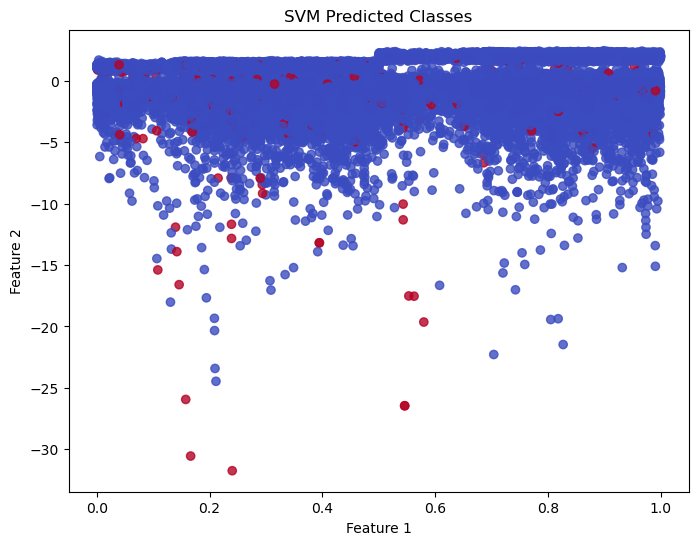

In [65]:
# Extract the two features for visualization
X_vis = X_test.iloc[:, :2].values
# Create a scatter plot of the predicted classes
plt.figure(figsize=(8, 6))
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_pred_svm, cmap='coolwarm', alpha=0.8)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Predicted Classes')
plt.show()


C:\Users\Siddhesh\AppData\Local\Temp\ipykernel_12540\2921629508.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append({
C:\Users\Siddhesh\AppData\Local\Temp\ipykernel_12540\2921629508.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append({
C:\Users\Siddhesh\AppData\Local\Temp\ipykernel_12540\2921629508.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append({
C:\Users\Siddhesh\AppData\Local\Temp\ipykernel_12540\2921629508.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append

                     Model  Precision    Recall  F1 Score     AUPRC
2           Random Forests   0.932432  0.758242  0.836364  0.707444
3  Support Vector Machines   0.932432  0.758242  0.836364  0.707444
1           Decision Trees   0.795181  0.725275  0.758621  0.577219
0      Logistic Regression   0.835821  0.615385  0.708861  0.515043


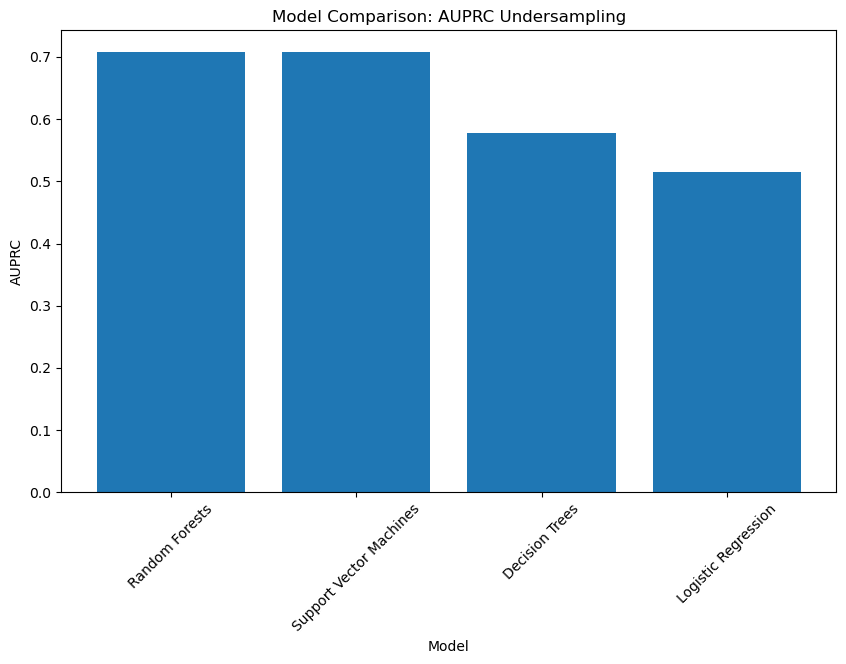

In [83]:
model_comparison = pd.DataFrame(columns=['Model', 'Precision', 'Recall', 'F1 Score', 'AUPRC'])
# Logistic Regression
precision_log = precision_score(y_test, y_pred1)
recall_log = recall_score(y_test, y_pred1)
f1_log = f1_score(y_test, y_pred1)
auprc_log = average_precision_score(y_test, y_pred1)
model_comparison = model_comparison.append({
    'Model': 'Logistic Regression',
    'Precision': precision_log,
    'Recall': recall_log,
    'F1 Score': f1_log,
    'AUPRC': auprc_log
}, ignore_index=True)
# Decision Trees
precision_dt = precision_score(y_test, y_pred2)
recall_dt = recall_score(y_test, y_pred2)
f1_dt = f1_score(y_test, y_pred2)
auprc_dt = average_precision_score(y_test, y_pred2)

model_comparison = model_comparison.append({
    'Model': 'Decision Trees',
    'Precision': precision_dt,
    'Recall': recall_dt,
    'F1 Score': f1_dt,
    'AUPRC': auprc_dt
}, ignore_index=True)


# Random Forests
precision_rf = precision_score(y_test, y_pred3)
recall_rf = recall_score(y_test, y_pred3)
f1_rf = f1_score(y_test, y_pred3)
auprc_rf = average_precision_score(y_test, y_pred3)

model_comparison = model_comparison.append({
    'Model': 'Random Forests',
    'Precision': precision_rf,
    'Recall': recall_rf,
    'F1 Score': f1_rf,
    'AUPRC': auprc_rf
}, ignore_index=True)


# Support Vector Machines (SVM)
precision_svm = precision_score(y_test, y_pred4)
recall_svm = recall_score(y_test, y_pred4)
f1_svm = f1_score(y_test, y_pred4)
auprc_svm = average_precision_score(y_test, y_pred4)

model_comparison = model_comparison.append({
    'Model': 'Support Vector Machines',
    'Precision': precision_svm,
    'Recall': recall_svm,
    'F1 Score': f1_svm,
    'AUPRC': auprc_svm
}, ignore_index=True)

# Sort the DataFrame by AUPRC
model_comparison = model_comparison.sort_values(by='AUPRC', ascending=False)

# Print the model comparison table
print(model_comparison)

# Bar plot of AUPRC scores
plt.figure(figsize=(10, 6))
plt.bar(model_comparison['Model'], model_comparison['AUPRC'])
plt.xlabel('Model')
plt.ylabel('AUPRC')
plt.title('Model Comparison: AUPRC Undersampling')
plt.xticks(rotation=45)
plt.show()


In [78]:
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score, accuracy_score
# Create a DataFrame for model comparison
model_comparison = pd.DataFrame(columns=['Model', 'Precision', 'Recall', 'F1 Score', 'AUPRC'])

# Logistic Regression
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
auprc_lr = average_precision_score(y_test, y_pred_lr)

model_comparison = model_comparison.append({
    'Model': 'Logistic Regression',
    'Precision': precision_lr,
    'Recall': recall_lr,
    'F1 Score': f1_lr,
    'AUPRC': auprc_lr
}, ignore_index=True)

# Decision Trees
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
auprc_dt = average_precision_score(y_test, y_pred_dt)

model_comparison = model_comparison.append({
    'Model': 'Decision Trees',
    'Precision': precision_dt,
    'Recall': recall_dt,
    'F1 Score': f1_dt,
    'AUPRC': auprc_dt
}, ignore_index=True)



# Random Forests
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
auprc_rf = average_precision_score(y_test, y_pred_rf)

model_comparison = model_comparison.append({
    'Model': 'Random Forests',
    'Precision': precision_rf,
    'Recall': recall_rf,
    'F1 Score': f1_rf,
    'AUPRC': auprc_rf
}, ignore_index=True)

# Support Vector Machines (SVM)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
auprc_svm = average_precision_score(y_test, y_pred_svm)

model_comparison = model_comparison.append({
    'Model': 'Support Vector Machines',
    'Precision': precision_svm,
    'Recall': recall_svm,
    'F1 Score': f1_svm,
    'AUPRC': auprc_svm
}, ignore_index=True)


C:\Users\Siddhesh\AppData\Local\Temp\ipykernel_12540\1707634224.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append({
C:\Users\Siddhesh\AppData\Local\Temp\ipykernel_12540\1707634224.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append({
C:\Users\Siddhesh\AppData\Local\Temp\ipykernel_12540\1707634224.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append({
C:\Users\Siddhesh\AppData\Local\Temp\ipykernel_12540\1707634224.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.appen

                     Model  Precision    Recall  F1 Score     AUPRC
2           Random Forests   0.905882  0.846154  0.875000  0.766793
1           Decision Trees   0.479730  0.780220  0.594142  0.374690
3  Support Vector Machines   0.124625  0.912088  0.219287  0.113827
0      Logistic Regression   0.082192  0.923077  0.150943  0.076008


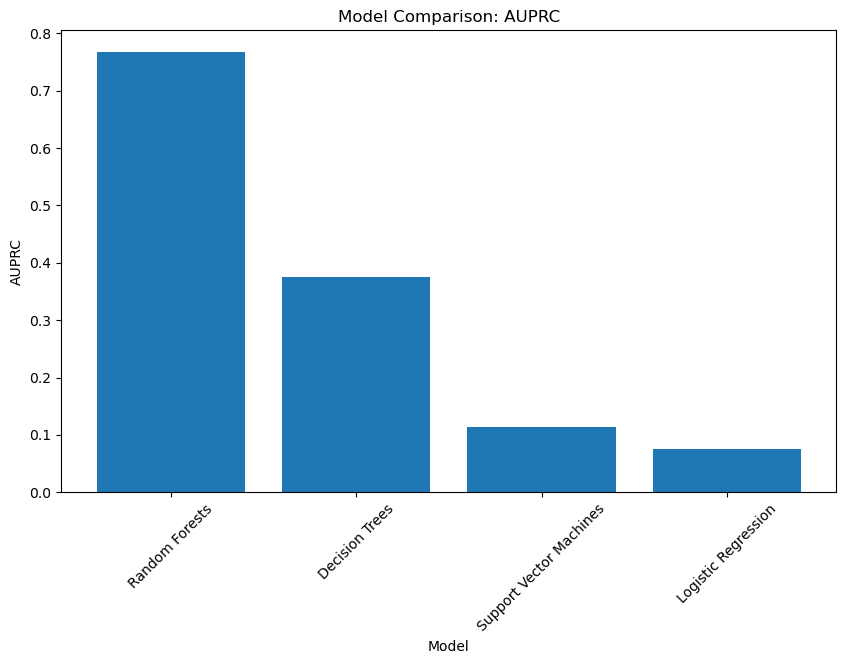

In [79]:
# Sort the DataFrame by AUPRC
model_comparison = model_comparison.sort_values(by='AUPRC', ascending=False)

# Print the model comparison table
print(model_comparison)

# Bar plot of AUPRC scores
plt.figure(figsize=(10, 6))
plt.bar(model_comparison['Model'], model_comparison['AUPRC'])
plt.xlabel('Model')
plt.ylabel('AUPRC')
plt.title('Model Comparison: AUPRC')
plt.xticks(rotation=45)
plt.show()

The "Random Forests" model performs the best overall, followed by "Decision Trees," "Support Vector Machines," and "Logistic Regression." 

In [80]:


# Make predictions on the test data using the Random Forests model
y_pred_test_rf = random_forest.predict(X_test)


In [81]:
# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_test_rf)*100
precision_rf = precision_score(y_test, y_pred_test_rf)*100
recall_rf = recall_score(y_test, y_pred_test_rf)*100
f1_rf = f1_score(y_test, y_pred_test_rf)*100
auprc_rf = average_precision_score(y_test, y_pred_test_rf)*100

In [82]:
print("Random Forests Model Evaluation:")
print("Accuracy: {:.4f}".format(accuracy_rf))
print("Precision: {:.4f}".format(precision_rf))
print("Recall: {:.4f}".format(recall_rf))
print("F1 Score: {:.4f}".format(f1_rf))
print("AUPRC: {:.4f}".format(auprc_rf))

Random Forests Model Evaluation:
Accuracy: 99.9565
Precision: 90.5882
Recall: 84.6154
F1 Score: 87.5000
AUPRC: 76.6793


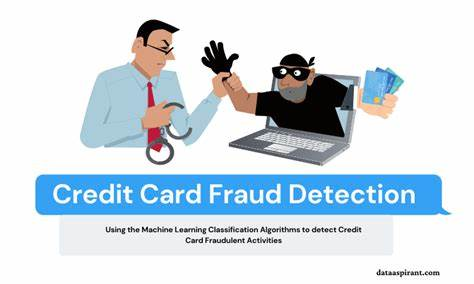